<h1><center>Physique numérique (PHY-3500)</center></h1>
<h1><center>Projet - Propagation dans milieu inhomogène</center></h1>

## Nom des membres de l'équipe:

### Nom, Prénom :  NI 
### Légaré, Ophélie : 111 182 608
### Parrot, Anaïs : 111 184 980
### Turgeon, David : 111 182 265

### Importation des modules :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Split-Step Beam propagation method

### Utilisation du Split-Step Beam propagation method pour la propagation d'un faisceau gaussien au travers une lentille

Simulation de la propagation d'un faisceau gaussien d'une longueur d'onde centrale de 0.663$\mu$m, d'une largeur de 10mm à travers une lentille de longueur focale de 16m sur une distance de 40m avec de incrément à tout les 0.8m.

In [2]:
"""Gaussian Beam"""
N = 255 # Sampling number # Quand on change le sampling number ça modifie le faisceau à la sortie, je ne sais pas pourquoi
L = 50e-3 # Display area
Ld = 0.633e-6 # Wavelength
k0 = 2*np.pi/Ld
w0 = 10e-3 # Initial beam waist
dz = 800e-3 # deltaz
Z = 40000e-3 # final z position
f = 16000e-3 # Focal length of lens

In [3]:
dx = L/N # Step size
x = np.zeros(N+1)
Kx = np.zeros(N+1)
y = np.zeros(N+1)
Ky = np.zeros(N+1)
for m in range(N+1):
    x[m] = (m)*dx-L/2
    Kx[m] = (2*np.pi*(m))/(N*dx)-((2*np.pi*(256-1))/(N*dx))/2
for n in range(N+1):
    y[n] = (n)*dx-L/2
    Ky[n] = (2*np.pi*(n))/(N*dx)-((2*np.pi*(256-1))/(N*dx))/2
    
X,Y = np.meshgrid(x,y)
KX,KY = np.meshgrid(Kx,Ky)

Gau_ini = (1/(w0*np.pi**0.5))*np.exp(-(X**2+Y**2)/(w0**2)) # Gaussian beam in space domain

Energy_init = dx*dx*sum(sum(abs(Gau_ini)**2)) # Energy of initial gaussian beam

Lens = np.exp(1j*k0/(2*f)*(X**2+Y**2)) # Lens eaquation

Gau_ini = Gau_ini*Lens # Gaussian beam trough the lens

H = np.exp(1j/(2*k0)*dz*(KX**2+KY**2)) # Free space transfer function of propagation

Gau = Gau_ini
nl = 0
z = np.arange(0,Z+dz,dz)
Gau_pro = np.zeros((N+1,len(z)),dtype = complex)
for i in z:
    FGau = np.fft.fft2(Gau)
    FGau = FGau*np.fft.fftshift(H)
    Gau = np.fft.ifft2(FGau)
    Gau_pro[:,nl] = Gau[:,int(N/2)]
    nl += 1

Energy_pro = dx*dx*sum(sum(abs(Gau)**2)) # Vérifier la conservation de l'énergie

X *= 1e3
Y *= 1e3
z *= 1e3


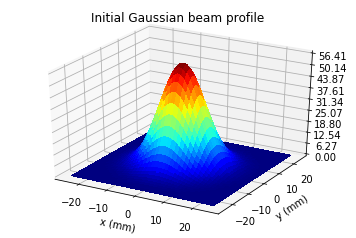

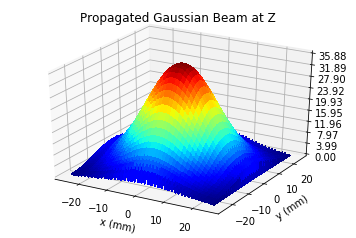

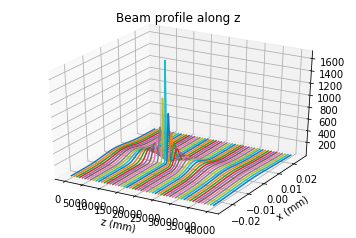

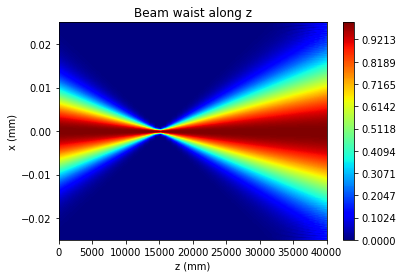

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, abs(Gau_ini), cmap=cm.jet,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel("x (mm)")
ax.set_ylabel('y (mm)')
ax.set_title("Initial Gaussian beam profile")
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, abs(Gau), cmap=cm.jet,
                       linewidth=0, antialiased=False)
ax.set_xlabel("x (mm)")
ax.set_ylabel('y (mm)')
ax.set_title("Propagated Gaussian Beam at Z")
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(nl):
    ax.plot(z[i]*np.ones(len(x)),  abs(Gau_pro[:,i]) ,x, zdir='y')
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_title("Beam profile along z")
plt.show()



fig,ax = plt.subplots()
A = np.zeros(nl)
for i in range(nl):
    A[i] = 1/max(abs(Gau_pro[:,i]))
B = np.diag(A)
N_Gau_pro = np.dot(abs(Gau_pro),B)
im = ax.contourf(z,x,N_Gau_pro,np.linspace(0,np.amax(abs(N_Gau_pro)),N),cmap = "jet")
ax.set_xlabel("z (mm)")
ax.set_ylabel("x (mm)")
ax.set_title("Beam waist along z")
fig.colorbar(im, ax=ax)
plt.show()


### Propagation of a Gaussian beam through a square-law medium

Propagation dans un milieu d'indice $n^2 = n_0^2 - n_2(x^2+y^2)$ avec $n_0 = 1.5$ et $n_2 = 0.01$. La simulation est effectué à sur une distance de 80m et évalué à tous les 2m pour un faisceau gaussien de largeur initiale de 5mm à une longueur d'onde de 0.633$\mu$m.

In [5]:
# Reset Jupyter memory
%reset -f 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [6]:
n0 = 1.5
n2 = 0.01
N = 255 # Samplig number
L = 20e-3 # Length of back round
Ld = 0.633e-6/n0  # Wavelength
k0 = 2*np.pi/Ld # wavenumber
w0 = 5e-3 # Gaussian beam waist
dz = 2000e-3 
Z = 85000e-3
dx = L/N


In [7]:
x = np.zeros(N+1)
Kx = np.zeros(N+1)
y = np.zeros(N+1)
Ky = np.zeros(N+1)
for m in range(N+1):
    x[m] = (m)*dx-L/2
    Kx[m] = (2*np.pi*(m))/(N*dx)-((2*np.pi*(256-1))/(N*dx))/2
for n in range(N+1):
    y[n] = (n)*dx-L/2
    Ky[n] = (2*np.pi*(n))/(N*dx)-((2*np.pi*(256-1))/(N*dx))/2
    
X,Y = np.meshgrid(x,y)
KX,KY = np.meshgrid(Kx,Ky)

Gau_ini = (1/(w0*np.pi**0.5))*np.ones((len(X),len(Y)))#np.exp(-(X**2+Y**2)/(w0**2)) # Gaussian beam in space domain

Energy_init = dx*dx*sum(sum(abs(Gau_ini)**2)) # Energy of initial gaussian beam

H = np.exp(1j/(2*k0)*dz*(KX**2+KY**2)) # Free space transfer function of propagation

S = -1j*(-n2/(2*n0**2)*(X**2+Y**2))*k0 # Paramètre d'inhomogénéité

Gau = Gau_ini

nl = 0
z = np.arange(0,Z+dz,dz)
Gau_pro = np.zeros((N+1,len(z)),dtype = complex)
for i in z:
    FGau = np.fft.fft2(Gau)
    FGau = FGau*np.fft.fftshift(H)
    Gau = np.fft.ifft2(FGau)
    Gau *= np.exp(S*dz)
    Gau_pro[:,nl] = Gau[:,int(N/2)]
    nl += 1

Energy_pro = dx*dx*sum(sum(abs(Gau)**2)) # Vérifier la conservation de l'énergie

x *= 1e3
y *= 1e3
z *= 1e3

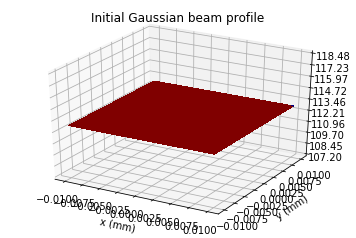

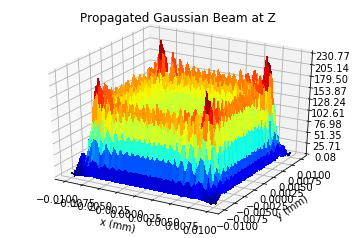

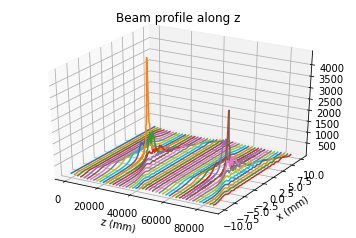

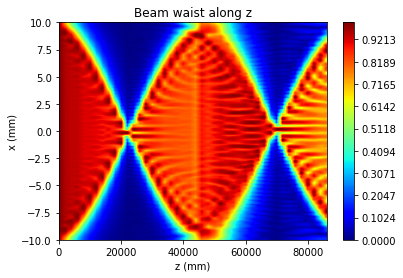

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, abs(Gau_ini), cmap=cm.jet,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel("x (mm)")
ax.set_ylabel('y (mm)')
ax.set_title("Initial Gaussian beam profile")
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, abs(Gau), cmap=cm.jet,
                       linewidth=0, antialiased=False)
ax.set_xlabel("x (mm)")
ax.set_ylabel('y (mm)')
ax.set_title("Propagated Gaussian Beam at Z")
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(nl):
    ax.plot(z[i]*np.ones(len(x)),  abs(Gau_pro[:,i]) ,x, zdir='y')
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_title("Beam profile along z")
plt.show()



fig,ax = plt.subplots()
A = np.zeros(nl)
for i in range(nl):
    A[i] = 1/max(abs(Gau_pro[:,i]))
B = np.diag(A)
N_Gau_pro = np.dot(abs(Gau_pro),B)
im = ax.contourf(z,x,N_Gau_pro,np.linspace(0,np.amax(abs(N_Gau_pro)),N),cmap = "jet")
ax.set_xlabel("z (mm)")
ax.set_ylabel("x (mm)")
ax.set_title("Beam waist along z")
fig.colorbar(im, ax=ax)
plt.show()

# Effet Kerr

In [9]:
# Reset Jupyter memory
%reset -f 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [10]:
D = 0.6
n0 = 1.5
n2 = 2e-13

N = 255
L = 10e-3
Ld = (0.633/n0)*1e-6 # Longueur d'onde
k0 = (2*np.pi)/Ld
w0 = 1e-3
dz = 25e-3
Z = 24000e-3



In [11]:
dx = L/N
x = np.zeros(N+1)
Kx = np.zeros(N+1)
for m in range(N+1):
    x[m] = (m)*dx-L/2
    Kx[m] = (2*np.pi*(m))/(N*dx)-((2*np.pi*(N))/(N*dx))/2

A = 0.9
Gau_ini = A*(1/(w0*np.pi**0.5))*np.exp(-(x**2)/(w0**2))
Energy_ini = dx*sum(abs(Gau_ini)**2)

H = np.exp(1j/(2*k0)*dz*Kx**2)

Gau = Gau_ini

nl = 0
z = np.arange(0,Z+dz,dz)
Gau_pro = np.zeros((N+1,len(z)),dtype = complex)
for i in z:
    FGau = np.fft.fft(Gau)
    FGau = FGau*np.fft.fftshift(H)
    Gau = np.fft.ifft(FGau)
    S = -1j*n2*k0*abs(Gau)**2 # Paramètre d'inhomogénéité
    Gau *= np.exp(S*dz)
    Gau_pro[:,nl] = Gau
    nl += 1

    
Energy_pro = dx*sum(abs(Gau)**2)

x *= 1e3
z *= 1e3

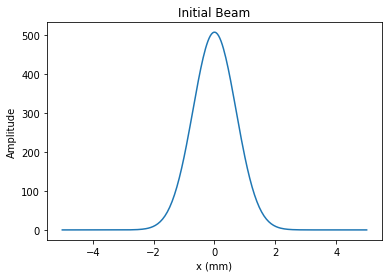

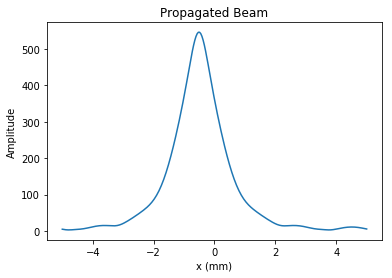

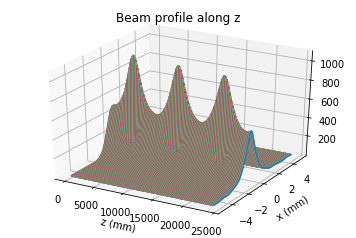

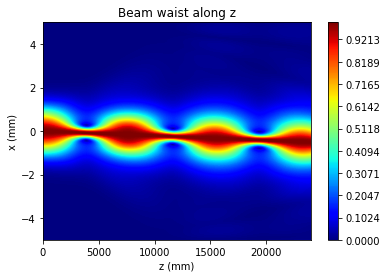

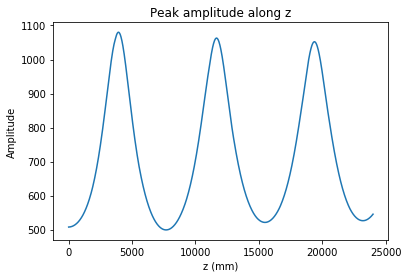

In [12]:
fig, ax = plt.subplots()
ax.plot(x,abs(Gau_ini))
ax.set_xlabel("x (mm)")
ax.set_ylabel("Amplitude")
ax.set_title("Initial Beam")
plt.show()

fig, ax = plt.subplots()
ax.plot(x,abs(Gau))
ax.set_xlabel("x (mm)")
ax.set_ylabel("Amplitude")
ax.set_title("Propagated Beam")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(nl):
    ax.plot(z[i]*np.ones(len(x)),  abs(Gau_pro[:,i]) ,x, zdir='y')
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_title("Beam profile along z")
plt.show()


fig,ax = plt.subplots()
A = np.zeros(nl)
for i in range(nl):
    A[i] = 1/max(abs(Gau_pro[:,i]))
B = np.diag(A)
N_Gau_pro = np.dot(abs(Gau_pro),B)
im = ax.contourf(z,x,N_Gau_pro,np.linspace(0,np.amax(abs(N_Gau_pro)),N),cmap = "jet")
ax.set_xlabel("z (mm)")
ax.set_ylabel("x (mm)")
ax.set_title("Beam waist along z")
fig.colorbar(im, ax=ax)
plt.show()


fig, ax = plt.subplots()
for i in range(nl):
    A[i] = max(abs(Gau_pro[:,i]))
ax.plot(z, A)
ax.set_xlabel("z (mm)")
ax.set_ylabel("Amplitude")
ax.set_title("Peak amplitude along z")
plt.show()